In [1]:
!pip install yfinance

In [2]:
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 9.0 MB/s eta 0:00:00


In [3]:
#Grab Data
import yfinance as yf

#Usual Suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pypfopt as pyp

# Use PyPortfolioOpt for Calculations
from pypfopt import EfficientFrontier, objective_functions
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting
from pypfopt import DiscreteAllocation

In [4]:
#Create a Portfolio
symbols = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS', 'BHARTIARTL.NS',
           'HINDUNILVR.NS', 'SBIN.NS', 'ITC.NS', 'LT.NS', 'KOTAKBANK.NS', 'AXISBANK.NS',
           'BAJFINANCE.NS', 'MARUTI.NS', 'SUNPHARMA.NS', 'ULTRACEMCO.NS', 'M&M.NS', 'NESTLEIND.NS',
           'TITAN.NS', 'TATASTEEL.NS', 'WIPRO.NS', 'HCLTECH.NS', 'ASIANPAINT.NS', 'NTPC.NS',
           'POWERGRID.NS', 'BAJAJ-AUTO.NS', 'CIPLA.NS', 'ADANIENT.NS', 'BPCL.NS', 'TATAMOTORS.NS',
           'GRASIM.NS', 'DRREDDY.NS', 'INDUSINDBK.NS', 'EICHERMOT.NS', 'TECHM.NS', 'ONGC.NS',
           'HEROMOTOCO.NS', 'COALINDIA.NS', 'HDFCLIFE.NS', 'TATACONSUM.NS', 'SBILIFE.NS',
           'BRITANNIA.NS', 'DIVISLAB.NS', 'JSWSTEEL.NS', 'UPL.NS', 'APOLLOHOSP.NS', 'SHRIRAMFIN.NS',
           'ADANIPORTS.NS', 'HINDALCO.NS', 'TATAPOWER.NS']

In [5]:
#Grap Market Capitalization for each stock in portfolio
mcaps = {}
for t in symbols:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]


In [73]:
#Get the stock data
portfolio = yf.download(symbols, start="2020-04-01", end="2025-04-01")['Close']

portfolio.head()
returns = portfolio.pct_change().dropna()
returns.to_csv('portfolio.csv', index=True)

[*********************100%***********************]  50 of 50 completed


In [7]:
# get market daily prices - BSE-500
market_prices = yf.download("BSE-500.BO", start='2020-04-01', end='2025-04-01')["Close"]
market_prices.head()

[*********************100%***********************]  1 of 1 completed


Ticker,BSE-500.BO
Date,
2020-04-01,10728.879883
2020-04-03,10527.290039
2020-04-07,11346.440430
2020-04-08,11364.040039
2020-04-09,11805.030273


In [8]:
# calculate asset covariance and delta
# market-implied risk premium, which is the market’s excess return divided by its variance
S = risk_models.CovarianceShrinkage(portfolio).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(market_prices, risk_free_rate=0.05796)
print(delta)



7.489841776463982


<Axes: xlabel='Ticker', ylabel='Ticker'>

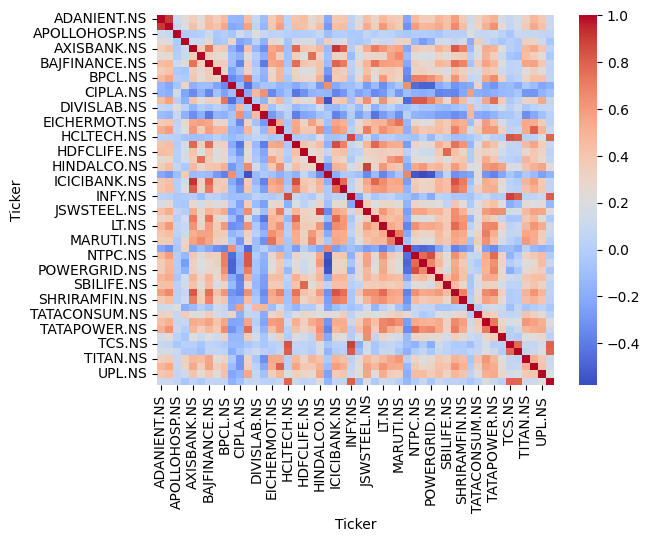

In [9]:
sns.heatmap(S.corr(), cmap='coolwarm')

In [10]:
# Calculate prior - market implied returns
market_prior = pyp.black_litterman.market_implied_prior_returns(mcaps, delta/10, S)
market_prior.name = 'Prior'
print(market_prior)

Ticker
ADANIENT.NS      0.029615
ADANIPORTS.NS    0.025797
APOLLOHOSP.NS    0.011745
ASIANPAINT.NS    0.011922
AXISBANK.NS      0.023847
BAJAJ-AUTO.NS    0.014708
BAJFINANCE.NS    0.024710
BHARTIARTL.NS    0.015596
BPCL.NS          0.018779
BRITANNIA.NS     0.008013
CIPLA.NS         0.007056
COALINDIA.NS     0.018378
DIVISLAB.NS      0.011606
DRREDDY.NS       0.008518
EICHERMOT.NS     0.018088
GRASIM.NS        0.019517
HCLTECH.NS       0.015094
HDFCBANK.NS      0.018843
HDFCLIFE.NS      0.014774
HEROMOTOCO.NS    0.016171
HINDALCO.NS      0.026435
HINDUNILVR.NS    0.009189
ICICIBANK.NS     0.023135
INDUSINDBK.NS    0.027326
INFY.NS          0.015232
ITC.NS           0.011180
JSWSTEEL.NS      0.023435
KOTAKBANK.NS     0.017648
LT.NS            0.018494
M&M.NS           0.022020
MARUTI.NS        0.018071
NESTLEIND.NS     0.008503
NTPC.NS          0.016782
ONGC.NS          0.017986
POWERGRID.NS     0.013847
RELIANCE.NS      0.018936
SBILIFE.NS       0.014967
SBIN.NS          0.023659
SHRIR

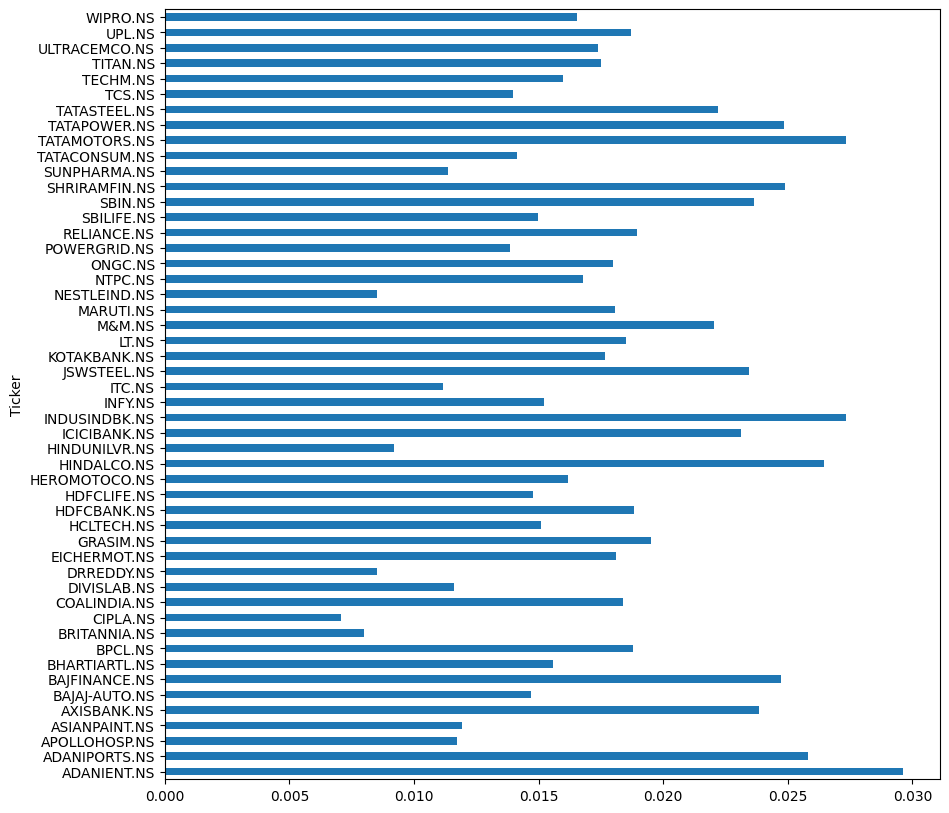

In [11]:
# plot prior
market_prior.plot.barh(figsize=(10,10));


In [12]:
pip install ffn

  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
moviepy 1.0.3 requires decorator<5.0,>=4.0.2, but you have decorator 5.2.1 which is incompatible.


In [13]:
import statsmodels.api as sm
import ffn  # For downloading additional factors

In [14]:
market_returns = market_prices.pct_change().dropna()
risk_free_rate=0.05796
excess_market_returns = market_returns - risk_free_rate

**Getting Different Values For Fama French Model like SMB, HML, Momentum, RMW**

## SMB Calculation

In [15]:
sorted_dict = dict(sorted(mcaps.items(), key=lambda item: item[1]))  # Sorts by value
print(sorted_dict)


{'UPL.NS': 518554058752, 'INDUSINDBK.NS': 531314835456, 'HEROMOTOCO.NS': 731880292352, 'DRREDDY.NS': 924757000192, 'APOLLOHOSP.NS': 965451513856, 'TATACONSUM.NS': 1076929101824, 'CIPLA.NS': 1142979952640, 'TECHM.NS': 1168977297408, 'TATAPOWER.NS': 1178920681472, 'BPCL.NS': 1193972596736, 'BRITANNIA.NS': 1210488717312, 'SHRIRAMFIN.NS': 1229016399872, 'HINDALCO.NS': 1331955105792, 'EICHERMOT.NS': 1438785208320, 'DIVISLAB.NS': 1455526641664, 'HDFCLIFE.NS': 1483145740288, 'SBILIFE.NS': 1515836932096, 'GRASIM.NS': 1717798567936, 'TATASTEEL.NS': 1750916005888, 'BAJAJ-AUTO.NS': 2146517516288, 'NESTLEIND.NS': 2181067702272, 'ASIANPAINT.NS': 2258787631104, 'TATAMOTORS.NS': 2259796623360, 'COALINDIA.NS': 2372959207424, 'JSWSTEEL.NS': 2453969829888, 'ADANIPORTS.NS': 2483180535808, 'WIPRO.NS': 2576864509952, 'ADANIENT.NS': 2695773814784, 'TITAN.NS': 2728727674880, 'POWERGRID.NS': 2733904756736, 'ONGC.NS': 2843725529088, 'M&M.NS': 3114198368256, 'AXISBANK.NS': 3380160233472, 'ULTRACEMCO.NS': 338246

In [16]:
# Small-Cap and Large-Cap Stocks (Examples)
small_caps = ["UPL.NS", "INDUSINDBK.NS", "HEROMOTOCO.NS"]  # Small-cap stocks
large_caps = ["TCS.NS", "HDFCBANK.NS", "RELIANCE.NS"]  # Large-cap stocks

# Download price data
small_cap_data = yf.download(small_caps, start="2020-04-01", end="2025-04-01")["Close"]
large_cap_data = yf.download(large_caps, start="2020-04-01", end="2025-04-01")["Close"]

# Compute daily returns
small_cap_returns = small_cap_data.pct_change().mean(axis=1).dropna()
large_cap_returns = large_cap_data.pct_change().mean(axis=1).dropna()

# Compute SMB
smb = (small_cap_returns - large_cap_returns)
smb
smb.to_csv('smb.csv', index=False)

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed


## HML Calculation

In [17]:

def get_book_to_market_ratio(ticker):
    try:
        stock = yf.Ticker(ticker)
        info = stock.info

        # Get Book Value Per Share & Shares Outstanding
        book_value_per_share = info.get("bookValue")
        shares_outstanding = info.get("sharesOutstanding")
        market_cap = info.get("marketCap")

        if not book_value_per_share or not shares_outstanding or not market_cap:
            return None  # Skip if data is missing

        # Compute Book Value of Equity
        book_value_equity = book_value_per_share * shares_outstanding

        # Compute B/M Ratio
        book_to_market = book_value_equity / market_cap
        return book_to_market

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

# Get B/M ratios for all tickers
bm_ratios = {ticker: get_book_to_market_ratio(ticker) for ticker in symbols}

# Remove None values (stocks with missing data)
bm_ratios = {k: v for k, v in bm_ratios.items() if v is not None}

# Convert to DataFrame and sort
df = pd.DataFrame(list(bm_ratios.items()), columns=["Ticker", "B/M Ratio"])
df = df.sort_values(by="B/M Ratio", ascending=False)

# Display 3 highest & 3 lowest B/M Ratios
print("\n📈 Top 3 Stocks with Highest Book-to-Market Ratio:")
print(df.head(3).to_string(index=False))

print("\n📉 Bottom 3 Stocks with Lowest Book-to-Market Ratio:")
print(df.tail(3).to_string(index=False))



📈 Top 3 Stocks with Highest Book-to-Market Ratio:
       Ticker  B/M Ratio
      ONGC.NS   1.239461
INDUSINDBK.NS   1.236691
  HINDALCO.NS   0.863867

📉 Bottom 3 Stocks with Lowest Book-to-Market Ratio:
      Ticker  B/M Ratio
NESTLEIND.NS   0.017898
  HCLTECH.NS   0.002117
     INFY.NS   0.001714


In [18]:
# Value and Growth Stocks (Examples)
value_stocks = ["INDUSINDBK.NS", "ONGC.NS", "HINDALCO.NS"]  # High book-to-market
growth_stocks = ["NESTLEIND.NS", "HCLTECH.NS", "INFY.NS"]  # Low book-to-market

# Download price data
value_data = yf.download(value_stocks, start="2020-04-01", end="2025-04-01")["Close"]
growth_data = yf.download(growth_stocks, start="2020-04-01", end="2025-04-01")["Close"]

# Compute daily returns
value_returns = value_data.pct_change().mean(axis=1).dropna()
growth_returns = growth_data.pct_change().mean(axis=1).dropna()

# Compute HML
hml = (value_returns - growth_returns)
hml
hml.to_csv('hml.csv', index=False)

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed


## Momentum Calculation

In [19]:
# Select momentum stocks (past winners & losers based on 12-month return)

# Download data
momentum_data = yf.download(symbols, start="2019-03-22", end="2025-04-01")["Close"]

# Compute 12-month returns (momentum)
momentum_returns = momentum_data.pct_change(periods=252).dropna()

# Identify top 30% winners and bottom 30% losers
top_momentum = momentum_returns.rank(axis=1, pct=True) > 0.7
bottom_momentum = momentum_returns.rank(axis=1, pct=True) < 0.3

# Compute Momentum Factor (MOM)
momentum_factor = momentum_returns[top_momentum].mean(axis=1) - momentum_returns[bottom_momentum].mean(axis=1)
momentum_factor.shape
momentum_factor.to_csv('momentum.csv', index=False)

[*********************100%***********************]  50 of 50 completed


## RMW Calculation

In [20]:

def get_roe(ticker):
    try:
        stock = yf.Ticker(ticker)

        # Get the most recent Net Income
        net_income = stock.financials.loc["Net Income Common Stockholders"].iloc[0]

        # Get the most recent Total Shareholders' Equity
        shareholder_equity = stock.balance_sheet.loc["Common Stock Equity"].iloc[0]

        # Ensure no division by zero
        if shareholder_equity == 0:
            return None

        # Compute ROE
        roe = net_income / shareholder_equity
        return roe

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

# Get ROE for all tickers
roe_values = {ticker: get_roe(ticker) for ticker in symbols}

# Remove None values (companies with missing data)
roe_values = {k: v for k, v in roe_values.items() if v is not None}

# Convert to DataFrame and sort
df = pd.DataFrame(list(roe_values.items()), columns=["Ticker", "ROE"])
df = df.sort_values(by="ROE", ascending=False)

# Display results
print("\n📈 Top 3 Companies with Highest ROE:")
print(df.head(3).to_string(index=False))

print("\n📉 Bottom 3 Companies with Lowest ROE:")
print(df.tail(3).to_string(index=False))



📈 Top 3 Companies with Highest ROE:
      Ticker      ROE
NESTLEIND.NS 0.972084
BRITANNIA.NS 0.542890
      TCS.NS 0.507332

📉 Bottom 3 Companies with Lowest ROE:
      Ticker       ROE
   GRASIM.NS  0.063444
      UPL.NS -0.048070
TATASTEEL.NS -0.048214


In [21]:
# Example high & low profitability stocks
high_profit_stocks = ["TCS.NS", "NESTLEIND.NS", "BRITANNIA.NS"]  # High return on equity (ROE)
low_profit_stocks = ["GRASIM.NS", "UPL.NS", "TATASTEEL.NS"]  # Low return on equity (ROE)

# Download price data
high_profit_data = yf.download(high_profit_stocks, start="2020-04-01", end="2025-04-01")["Close"]
low_profit_data = yf.download(low_profit_stocks, start="2020-04-01", end="2025-04-01")["Close"]

# Compute daily returns
high_profit_returns = high_profit_data.pct_change().mean(axis=1).dropna()
low_profit_returns = low_profit_data.pct_change().mean(axis=1).dropna()

# Compute RMW
rmw = (high_profit_returns - low_profit_returns)

rmw.to_csv('rmw.csv', index=False)
rmw.shape

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed


(1236,)

Downloading Market Data and Saving

In [22]:

# Define the stock symbol and date range
symbol = "BSE-500.BO"
start_date = "2020-04-01"
end_date = "2025-04-01"

# Download data from Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate percentage change
pct_change = data[['Close']].pct_change()

# Set the first value to 0
pct_change.iloc[0] = 0

# Save only the percentage change to CSV file without header and index (date column)
pct_change.to_csv("BSE500_Pct_Change.csv", header=False, index=False)

print("Percentage change data downloaded and saved as BSE500_Pct_Change.csv without header and date column.")


[*********************100%***********************]  1 of 1 completed

Percentage change data downloaded and saved as BSE500_Pct_Change.csv without header and date column.


In [23]:

from scipy.stats import t

# Load data from CSV files
mkt_rf = pd.read_csv("BSE500_Pct_Change.csv").values
smb = pd.read_csv("smb.csv").values
hml = pd.read_csv("hml.csv").values
rmw = pd.read_csv("rmw.csv").values
momentum = pd.read_csv("momentum.csv").values


# Risk-free rate (constant)
rf = 0.056

# Initialize results list
results_list = []

# Loop through each ticker
for ticker in symbols:
    print(f"Processing {ticker}...")

    # Download stock data from Yahoo Finance
    stock_data = yf.download(ticker, start="2020-04-01", end="2025-04-01", progress=False)

    # Compute percentage change and subtract risk-free rate
    stock_returns = stock_data['Close'].pct_change().dropna().values - rf

    # Ensure lengths match across datasets
    min_length = min(len(stock_returns), len(mkt_rf), len(smb), len(hml), len(rmw), len(momentum))

    # Trim all arrays to the shortest length
    stock_returns = stock_returns[:min_length]
    mkt_rf_trimmed = mkt_rf[:min_length]
    smb_trimmed = smb[:min_length]
    hml_trimmed = hml[:min_length]
    rmw_trimmed = rmw[:min_length]
    momentum_trimmed = momentum[:min_length]

    # Prepare independent variables (Factor exposures)
    X = np.column_stack((mkt_rf_trimmed, smb_trimmed, hml_trimmed, rmw_trimmed, momentum_trimmed))
    X = sm.add_constant(X)  # Add intercept

    # Dependent variable (Excess Return)
    y = stock_returns

    # Fit OLS regression
    model = sm.OLS(y, X).fit()
    betas = model.params
    betas

    # Compute expected excess return using factor means
    factor_means = np.nanmean([mkt_rf_trimmed, smb_trimmed, hml_trimmed, rmw_trimmed, momentum_trimmed], axis=1)
    expected_excess_return = np.dot(betas[1:], factor_means)  # Exclude intercept
    expected_return = expected_excess_return + np.nanmean(mkt_rf_trimmed)  # Add risk-free rate

    # Compute standard error and confidence interval
    se = np.sqrt(model.mse_resid)  # Standard error
    dof = len(y) - len(betas)  # Degrees of freedom
    t_stat = t.ppf(0.975, dof)  # 95% confidence interval

    # Confidence Interval Calculation
    margin_of_error = t_stat * se / np.sqrt(len(y))
    ci_lower = expected_return - margin_of_error
    ci_upper = expected_return + margin_of_error

    # Append results to list
    results_list.append({
        "Ticker": ticker,
        "Expected_Return": expected_return,
        "CI_Lower": ci_lower,
        "CI_Upper": ci_upper
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results_list)

# Save results to CSV
results_df.to_csv("expected_returns.csv", index=False)

print("Analysis complete! Results saved to expected_returns.csv.")
print(results_df)


Processing RELIANCE.NS...
Processing TCS.NS...
Processing HDFCBANK.NS...
Processing INFY.NS...
Processing ICICIBANK.NS...
Processing BHARTIARTL.NS...
Processing HINDUNILVR.NS...
Processing SBIN.NS...
Processing ITC.NS...
Processing LT.NS...
Processing KOTAKBANK.NS...
Processing AXISBANK.NS...
Processing BAJFINANCE.NS...
Processing MARUTI.NS...
Processing SUNPHARMA.NS...
Processing ULTRACEMCO.NS...
Processing M&M.NS...
Processing NESTLEIND.NS...
Processing TITAN.NS...
Processing TATASTEEL.NS...
Processing WIPRO.NS...
Processing HCLTECH.NS...
Processing ASIANPAINT.NS...
Processing NTPC.NS...
Processing POWERGRID.NS...
Processing BAJAJ-AUTO.NS...
Processing CIPLA.NS...
Processing ADANIENT.NS...
Processing BPCL.NS...
Processing TATAMOTORS.NS...
Processing GRASIM.NS...
Processing DRREDDY.NS...
Processing INDUSINDBK.NS...
Processing EICHERMOT.NS...
Processing TECHM.NS...
Processing ONGC.NS...
Processing HEROMOTOCO.NS...
Processing COALINDIA.NS...
Processing HDFCLIFE.NS...
Processing TATACONS

In [24]:
# Create a dictionary with tickers as keys and expected return as float values
expected_returns_dict = {result["Ticker"]: result["Expected_Return"].item() for result in results_list}

# Create a dictionary with tickers as keys and confidence intervals as float values
confidence_intervals_dict = {
    result["Ticker"]: (result["CI_Lower"].item(), result["CI_Upper"].item()) for result in results_list
}

print("Expected Returns Dictionary:", expected_returns_dict)
print("Confidence Intervals Dictionary:", confidence_intervals_dict)


Expected Returns Dictionary: {'RELIANCE.NS': 0.001393706591805058, 'TCS.NS': 0.0017891284728359766, 'HDFCBANK.NS': 0.0011636907633846253, 'INFY.NS': 0.0023141458181310977, 'ICICIBANK.NS': 0.0020737006912268053, 'BHARTIARTL.NS': 0.0017773166305172416, 'HINDUNILVR.NS': 0.0013793618732675698, 'SBIN.NS': 0.002510285900353954, 'ITC.NS': 0.0007289405835096973, 'LT.NS': 0.001470871610183193, 'KOTAKBANK.NS': 0.0011491725446550174, 'AXISBANK.NS': 0.0012347358983664522, 'BAJFINANCE.NS': 0.0018438917612112501, 'MARUTI.NS': 0.0012135329007577865, 'SUNPHARMA.NS': 0.001902101052907376, 'ULTRACEMCO.NS': 0.0015504069474425479, 'M&M.NS': 0.0005204621187781412, 'NESTLEIND.NS': 0.0012797766240818383, 'TITAN.NS': 0.0026075799991057335, 'TATASTEEL.NS': 0.002337825719752145, 'WIPRO.NS': 0.00314261888603319, 'HCLTECH.NS': 0.0014559230533825874, 'ASIANPAINT.NS': 0.002546295722534454, 'NTPC.NS': 0.0013801951576336547, 'POWERGRID.NS': 0.0015716060119377933, 'BAJAJ-AUTO.NS': 0.0005270864251717167, 'CIPLA.NS': 0.

In [25]:
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=expected_returns_dict)

In [26]:
variances = []
for _, (lb, ub) in confidence_intervals_dict.items():
    sigma = (ub - lb) / 2
    variances.append(sigma ** 2)

print(variances)
omega = np.diag(variances)



[7.127093054356155e-07, 6.157928540912562e-07, 6.454485517700776e-07, 7.507240190207631e-07, 8.492946557719229e-07, 8.2282780270482e-07, 5.508965593998555e-07, 8.574662390428213e-07, 6.279403027056128e-07, 7.557845699644188e-07, 8.332950379276366e-07, 1.0684182924082443e-06, 1.294075579497876e-06, 8.393888056354074e-07, 6.911342320478121e-07, 7.333970146335533e-07, 1.2160738790265948e-06, 4.7164370691723054e-07, 8.831154628362061e-07, 1.5246708976084013e-06, 9.872401228901068e-07, 7.891091957545031e-07, 7.255766113227648e-07, 8.490058765027314e-07, 8.558888045400398e-07, 8.032154372265911e-07, 8.636113325007237e-07, 3.203003810721809e-06, 1.0709824775786138e-06, 1.738290881558018e-06, 7.135195379025554e-07, 7.38090623914716e-07, 1.1600437660827427e-06, 9.909148525665454e-07, 9.93275677453757e-07, 9.565860065311872e-07, 7.921133391103723e-07, 9.609178969666241e-07, 8.41042790658436e-07, 7.79763940776967e-07, 7.658782790877404e-07, 5.118148401560974e-07, 9.86635774730646e-07, 9.660477142

In [27]:
# run the Bl model
bl = pyp.BlackLittermanModel(S, pi=market_prior, absolute_views=expected_returns_dict)

In [28]:
# Posterior estimate of returns
bl_return = bl.bl_returns()*10
bl_return.name = 'Posterior'

In [29]:
# get historical returns
mu = pyp.expected_returns.mean_historical_return(portfolio)
mu.name = 'Historical'
# print(mu)

In [30]:
# create returns dataframe
returns_df = pd.DataFrame([market_prior, mu, bl_return, pd.Series(expected_returns_dict)*10],
             index=['Prior', 'Historical','Posterior', 'Views']).T
print(returns_df)

                  Prior  Historical  Posterior     Views
ADANIENT.NS    0.029615    0.788871   0.051917  0.038630
ADANIPORTS.NS  0.025797    0.385765   0.038079  0.013614
APOLLOHOSP.NS  0.011745    0.448760   0.026137  0.029571
ASIANPAINT.NS  0.011922    0.088043   0.024364  0.025463
AXISBANK.NS    0.023847    0.258289   0.032869  0.012347
BAJAJ-AUTO.NS  0.014708    0.345318   0.015594  0.005271
BAJFINANCE.NS  0.024710    0.332635   0.040280  0.018439
BHARTIARTL.NS  0.015596    0.344286   0.033121  0.017773
BPCL.NS        0.018779    0.191300   0.025583  0.012845
BRITANNIA.NS   0.008013    0.166302   0.013074  0.008958
CIPLA.NS       0.007056    0.299189   0.014537  0.012318
COALINDIA.NS   0.018378    0.355302   0.024019  0.009534
DIVISLAB.NS    0.011606    0.266266   0.025445  0.025901
DRREDDY.NS     0.008518    0.163400   0.015736  0.011773
EICHERMOT.NS   0.018088    0.343704   0.019699  0.006949
GRASIM.NS      0.019517    0.422203   0.029113  0.020315
HCLTECH.NS     0.015094    0.36

In [32]:
# write it for future reference
returns_df.to_csv('data/returns.csv', header=True,)
returns_df = pd.read_csv('data/returns.csv', index_col=[0], )

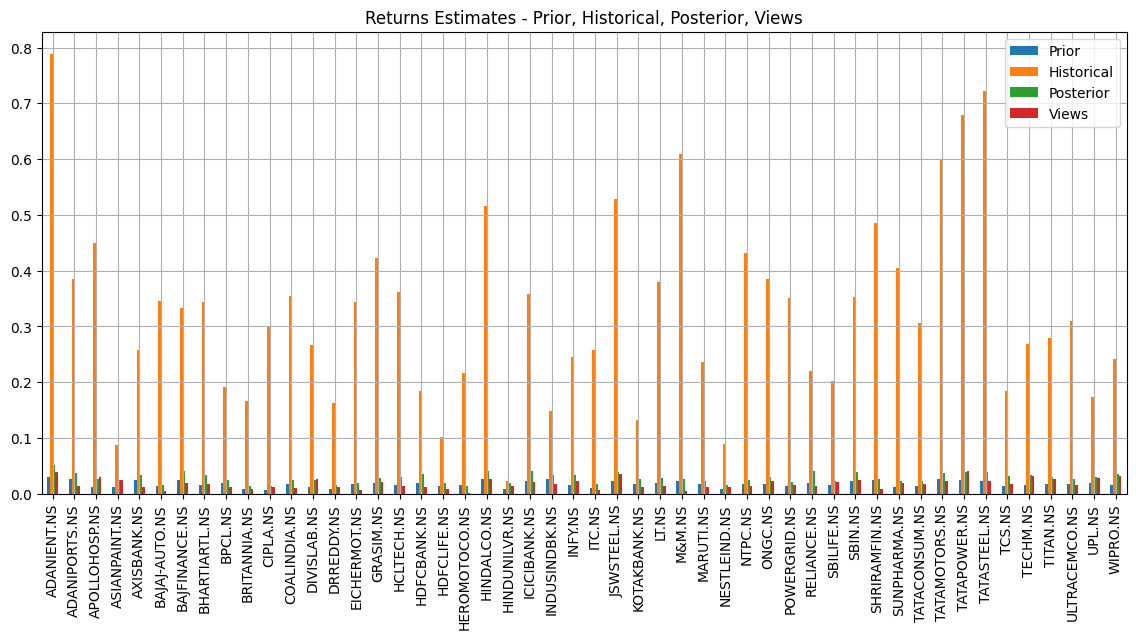

In [33]:
# plot the returns
returns_df.plot.bar(figsize=(14,6), title = 'Returns Estimates - Prior, Historical, Posterior, Views', grid=True);


In [34]:
# get the covariance matrix
S_bl = bl.bl_cov()
S_bl.to_csv('data/S_bl.csv')
S_bl = pd.read_csv('data/S_bl.csv',  index_col=[0])
S_bl

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Ticker,,,,,,,,,,,,,,,,,,,,,
ADANIENT.NS,0.272674,0.141355,0.026478,0.028013,0.042006,0.026831,0.055311,0.030026,0.046896,0.011619,...,0.032039,0.062440,0.065167,0.042712,0.021577,0.030606,0.033212,0.038031,0.045037,0.027526
ADANIPORTS.NS,0.141355,0.157111,0.021256,0.022555,0.039004,0.024574,0.042448,0.028643,0.042434,0.010076,...,0.027102,0.052759,0.063700,0.043443,0.018735,0.028099,0.029979,0.035528,0.035349,0.024912
APOLLOHOSP.NS,0.026478,0.021256,0.100664,0.012572,0.015923,0.014802,0.025105,0.011435,0.015905,0.011080,...,0.018125,0.023440,0.024224,0.018761,0.010415,0.020211,0.019430,0.018596,0.019265,0.019133
ASIANPAINT.NS,0.028013,0.022555,0.012572,0.062946,0.015958,0.014635,0.023354,0.010149,0.016407,0.016527,...,0.020917,0.018765,0.016595,0.013458,0.012858,0.014394,0.023712,0.021162,0.020271,0.013666
AXISBANK.NS,0.042006,0.039004,0.015923,0.015958,0.107568,0.025172,0.051508,0.022682,0.029785,0.011133,...,0.019562,0.044905,0.041616,0.033664,0.016071,0.016619,0.028751,0.028467,0.032941,0.021285
BAJAJ-AUTO.NS,0.026831,0.024574,0.014802,0.014635,0.025172,0.072015,0.023617,0.018656,0.020526,0.010343,...,0.018038,0.036595,0.027400,0.021399,0.011821,0.012584,0.024143,0.020133,0.021409,0.015696
BAJFINANCE.NS,0.055311,0.042448,0.025105,0.023354,0.051508,0.023617,0.118638,0.023286,0.027951,0.013822,...,0.027206,0.051237,0.040798,0.034095,0.017386,0.023735,0.035557,0.030715,0.032009,0.022132
BHARTIARTL.NS,0.030026,0.028643,0.011435,0.010149,0.022682,0.018656,0.023286,0.071894,0.019271,0.009105,...,0.016628,0.028622,0.024746,0.017503,0.012834,0.016757,0.016506,0.018067,0.016973,0.015241
BPCL.NS,0.046896,0.042434,0.015905,0.016407,0.029785,0.020526,0.027951,0.019271,0.099202,0.009642,...,0.017484,0.043953,0.045529,0.038719,0.016093,0.019957,0.022220,0.025706,0.028820,0.020645


Calculate Posterior Estimate Returns

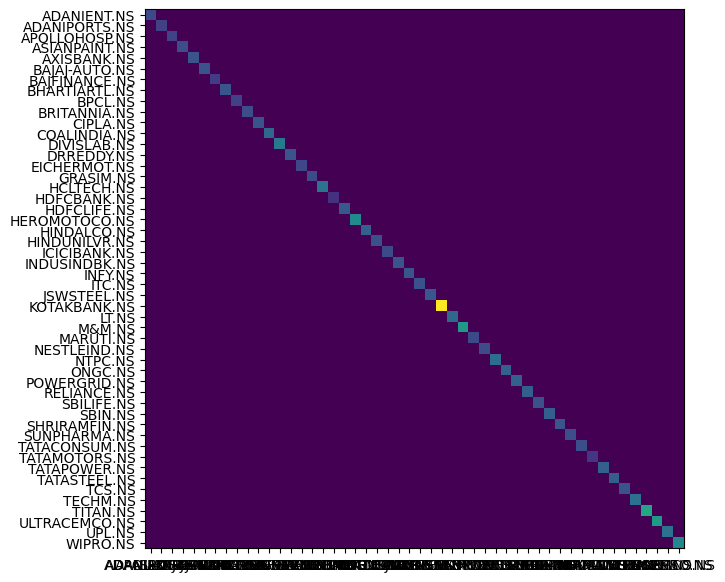

In [35]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [45]:
# We are using the shortcut to automatically compute market-implied prior
bl = BlackLittermanModel(S, pi=market_prior, market_caps=mcaps, risk_aversion=delta,
                        absolute_views=expected_returns_dict, omega=omega)

In [56]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()*100
ret_bl

,0
Ticker,
ADANIENT.NS,0.386293
ADANIPORTS.NS,0.136254
APOLLOHOSP.NS,0.295677
ASIANPAINT.NS,0.254601
AXISBANK.NS,0.123526
BAJAJ-AUTO.NS,0.052728
BAJFINANCE.NS,0.184471
BHARTIARTL.NS,0.177787
BPCL.NS,0.128480


In [57]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(expected_returns_dict),mu],
             index=["Prior", "Posterior", "Views","Historical"]).T
rets_df

,Prior,Posterior,Views,Historical
ADANIENT.NS,0.029615,0.386293,0.003863,0.788871
ADANIPORTS.NS,0.025797,0.136254,0.001361,0.385765
APOLLOHOSP.NS,0.011745,0.295677,0.002957,0.448760
ASIANPAINT.NS,0.011922,0.254601,0.002546,0.088043
AXISBANK.NS,0.023847,0.123526,0.001235,0.258289
BAJAJ-AUTO.NS,0.014708,0.052728,0.000527,0.345318
BAJFINANCE.NS,0.024710,0.184471,0.001844,0.332635
BHARTIARTL.NS,0.015596,0.177787,0.001777,0.344286
BPCL.NS,0.018779,0.128480,0.001284,0.191300
BRITANNIA.NS,0.008013,0.089588,0.000896,0.166302


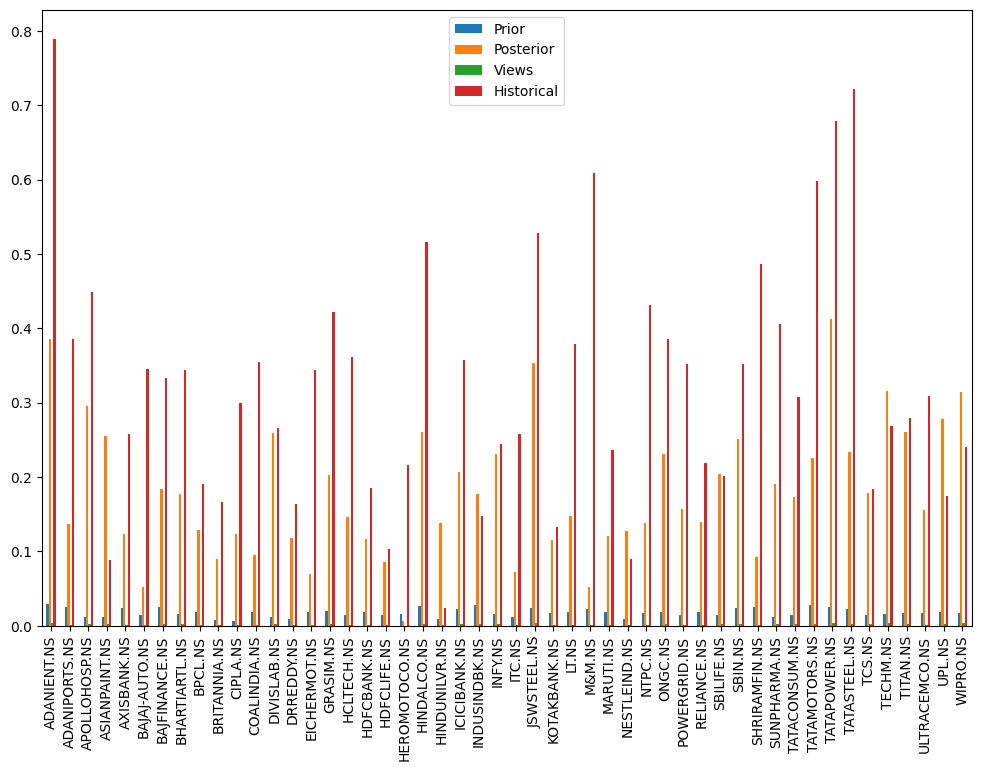

In [58]:
rets_df.plot.bar(figsize=(12,8));

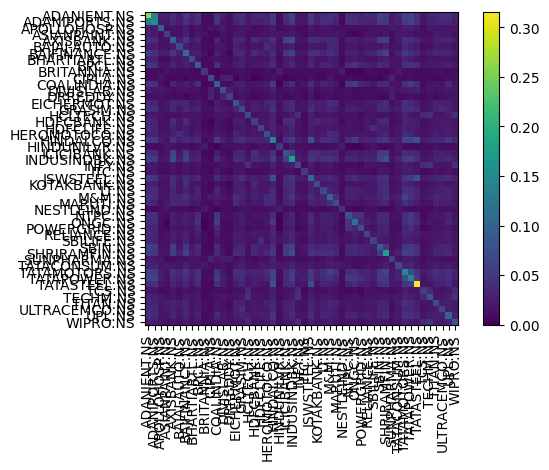

In [59]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

#  Portfolio Allocation

In [60]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

/usr/local/lib/python3.11/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('ADANIENT.NS', 0.04687),
             ('ADANIPORTS.NS', 0.0),
             ('APOLLOHOSP.NS', 0.04964),
             ('ASIANPAINT.NS', 0.04367),
             ('AXISBANK.NS', 0.00184),
             ('BAJAJ-AUTO.NS', 0.0),
             ('BAJFINANCE.NS', 0.01387),
             ('BHARTIARTL.NS', 0.02356),
             ('BPCL.NS', 0.00481),
             ('BRITANNIA.NS', 0.01045),
             ('CIPLA.NS', 0.01707),
             ('COALINDIA.NS', 0.0),
             ('DIVISLAB.NS', 0.04147),
             ('DRREDDY.NS', 0.01406),
             ('EICHERMOT.NS', 0.0),
             ('GRASIM.NS', 0.02113),
             ('HCLTECH.NS', 0.01288),
             ('HDFCBANK.NS', 0.00759),
             ('HDFCLIFE.NS', 0.00072),
             ('HEROMOTOCO.NS', 0.0),
             ('HINDALCO.NS', 0.0228),
             ('HINDUNILVR.NS', 0.02094),
             ('ICICIBANK.NS', 0.02324),
             ('INDUSINDBK.NS', 0.0079),
             ('INFY.NS', 0.03402),
             ('ITC.NS', 0.0031),
       

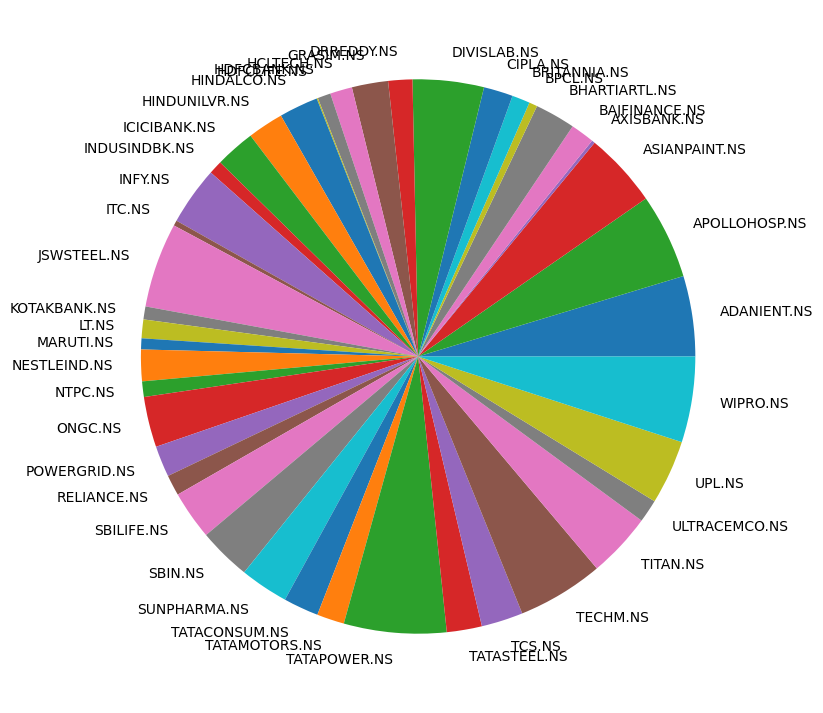

In [61]:
pd.Series(weights).plot.pie(figsize=(9,9));

Expected annual return: 24.7%
Annual volatility: 16.2%
Sharpe Ratio: 1.52


/usr/local/lib/python3.11/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(np.float64(0.24658603439366492),
 np.float64(0.16225751350150913),
 np.float64(1.5197202833468262))

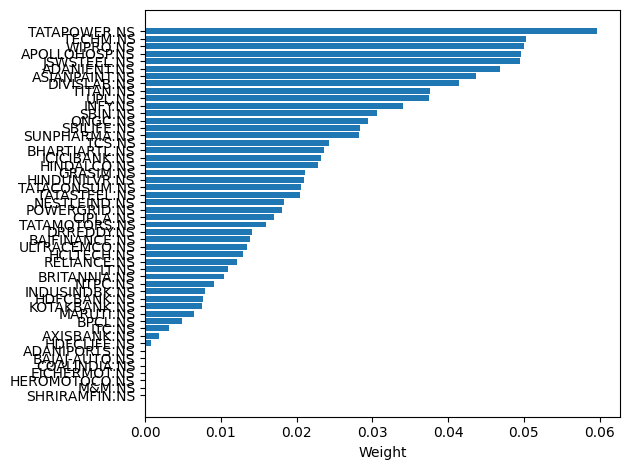

In [79]:
from pypfopt.plotting import plot_weights

# Maximum Sharpe
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()

plot_weights(weights)
ef.portfolio_performance(verbose = True, risk_free_rate = 0.056)